In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
np.random.seed(seed=1)
mpl.rcParams["figure.dpi"]=400
mpl.rcParams["font.size"]=4
fig=plt.gcf()
fig.set_size_inches(20,20)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline
%autosave 10

Autosaving every 10 seconds


In [2]:
df=pd.read_csv("cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1


In [3]:
df["default payment next month"].mean()

0.2217971797179718

In [4]:
df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

# LOGISTIC REGRESSION

In [5]:
my_new_lr=LogisticRegression(C=1.0,class_weight=None,dual=False,
                            fit_intercept=True,intercept_scaling=1,
                            max_iter=100,multi_class="warn",n_jobs=None
                            ,penalty="l2",random_state=None,solver="warn"
                            ,tol=0.0001,verbose=0,warm_start=False)
#WE CAN INSTANTIATE THE DEFAULT OPTIONS LATER ALSO
my_new_lr.C=0.1
my_new_lr.solver="liblinear"
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
X=df["EDUCATION"][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [7]:
y=df["default payment next month"][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
new_X=df["EDUCATION"][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [10]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
df["default payment next month"][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

# GENERATING SYNTHETIC DATA

In [12]:
X=np.random.uniform(low=0.0,high=10.0,size=(1000,))
X[0:10]

array([9.97184811, 9.32557359, 1.28124448, 9.99040515, 2.36088977,
       3.96580727, 3.87910741, 6.69746037, 9.35539071, 8.46310917])

In [13]:
#Here mean is loc and standard deviation is scale
slope=0.25
intercept=-1.25
y=slope*X + np.random.normal(loc=0.0,scale=1.0,size=(1000,)) + intercept

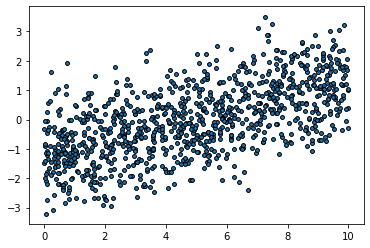

In [14]:
plt.scatter(X,y,s=15,ec="black")

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2778856418419215
[0.25635791]


In [17]:
y_pred=lin_reg.predict(X.reshape(-1,1))

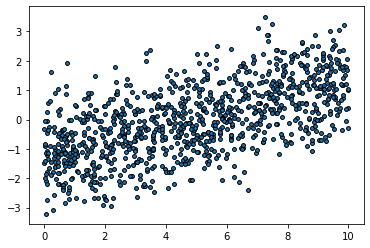

In [18]:
plt.scatter(X,y,s=15,ec="black")

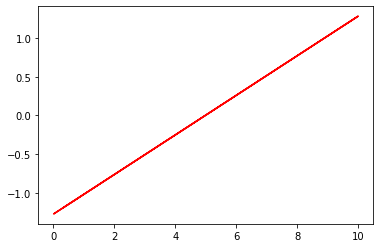

In [19]:
plt.plot(X,y_pred,"r")

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["EDUCATION"].values.reshape(-1,1),df["default payment next month"].values,test_size=0.2,random_state=24)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [22]:
np.mean(y_train)

0.223102526838873

In [23]:
np.mean(y_test)

0.21657603600225014

In [24]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [25]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [26]:
is_correct= y_pred==y_test
np.mean(is_correct)

0.7834239639977498

In [27]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7834239639977498

In [28]:
example_lr.score(X_test,y_test)

0.7834239639977498

In [29]:
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [30]:
y_pred_proba=example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [31]:
prob_sum=np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [32]:
prob_sum.shape

(5333,)

In [33]:
np.unique(prob_sum)

array([1.])

In [34]:
pos_proba=y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Number of samples')

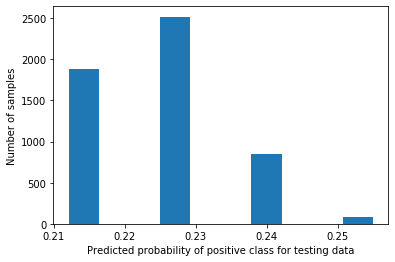

In [35]:
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [36]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

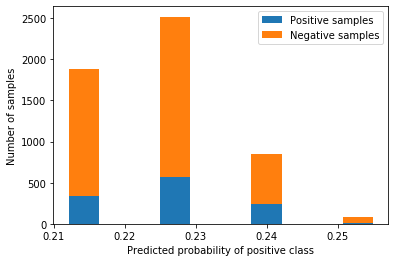

In [37]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [38]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pos_proba)

Text(0.5, 1.0, 'ROC curve')

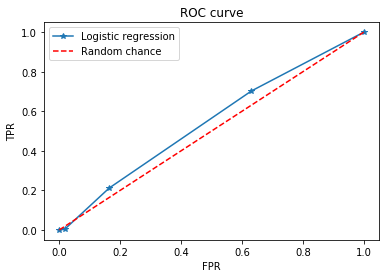

In [39]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [40]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [41]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

In [42]:
metrics.precision_recall_curve(y_test,pos_proba)

(array([0.21657604, 0.23536232, 0.26315789, 0.06097561, 1.        ]),
 array([1.        , 0.7030303 , 0.21212121, 0.004329  , 0.        ]),
 array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ]))

# LOGISTIC REGRESSION

In [43]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [44]:
features_response=['LIMIT_BAL','EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
corr=df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


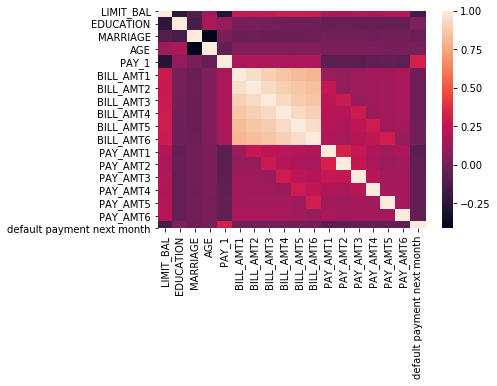

In [45]:
sns.heatmap(corr)

# F TEST

In [46]:
#SEPEARTING THE FEATURES AND RESPONSES
X=df[features_response].iloc[:,:-1].values
y=df[features_response].iloc[:,-1].values
print(X.shape,y.shape)

(26664, 17) (26664,)


In [47]:
from sklearn.feature_selection import f_classif
[f_stat,f_p_value]=f_classif(X,y)

In [48]:
f_test_df=pd.DataFrame({"Feature":features_response[:-1],
                       "F statistic":f_stat,"p value":f_p_value})
f_test_df.sort_values("p value")

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [49]:
from sklearn.feature_selection import SelectPercentile
selector=SelectPercentile(f_classif,percentile=20)
selector.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000001D15360CE58>)

In [50]:
best_feature_ix=selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [51]:
features=features_response[:-1]
best_features=[features[counter] for counter in range(len(features))
              if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [52]:
overall_default_rate=df["default payment next month"].mean()
overall_default_rate

0.2217971797179718

In [53]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


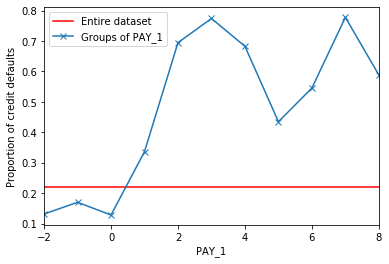

In [54]:
axes=plt.axes()
axes.axhline(overall_default_rate,color="red")
group_by_pay_mean_y.plot(marker="x",legend=False,ax=axes)
axes.set_ylabel("Proportion of credit defaults")
axes.legend(["Entire dataset","Groups of PAY_1"])

In [55]:
pos_mask= y==1
neg_mask= y==0

Text(0.5, 1.0, 'Credit limits by response variable')

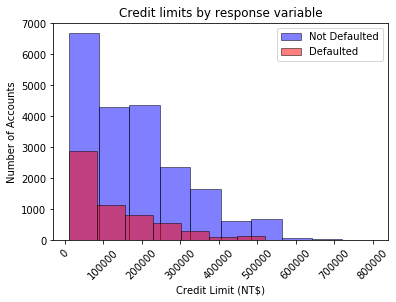

In [56]:
axes=plt.axes()
axes.hist(df.loc[neg_mask,"LIMIT_BAL"],alpha=0.5,color="blue",ec="black")
axes.hist(df.loc[pos_mask,"LIMIT_BAL"],alpha=0.5,color="red",ec="black")
axes.tick_params(axis="x",labelrotation=45)
axes.set_xlabel("Credit Limit (NT$)")
axes.set_ylabel("Number of Accounts")
axes.legend(["Not Defaulted","Defaulted"])
axes.set_title("Credit limits by response variable")

In [57]:
bin_edges=list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

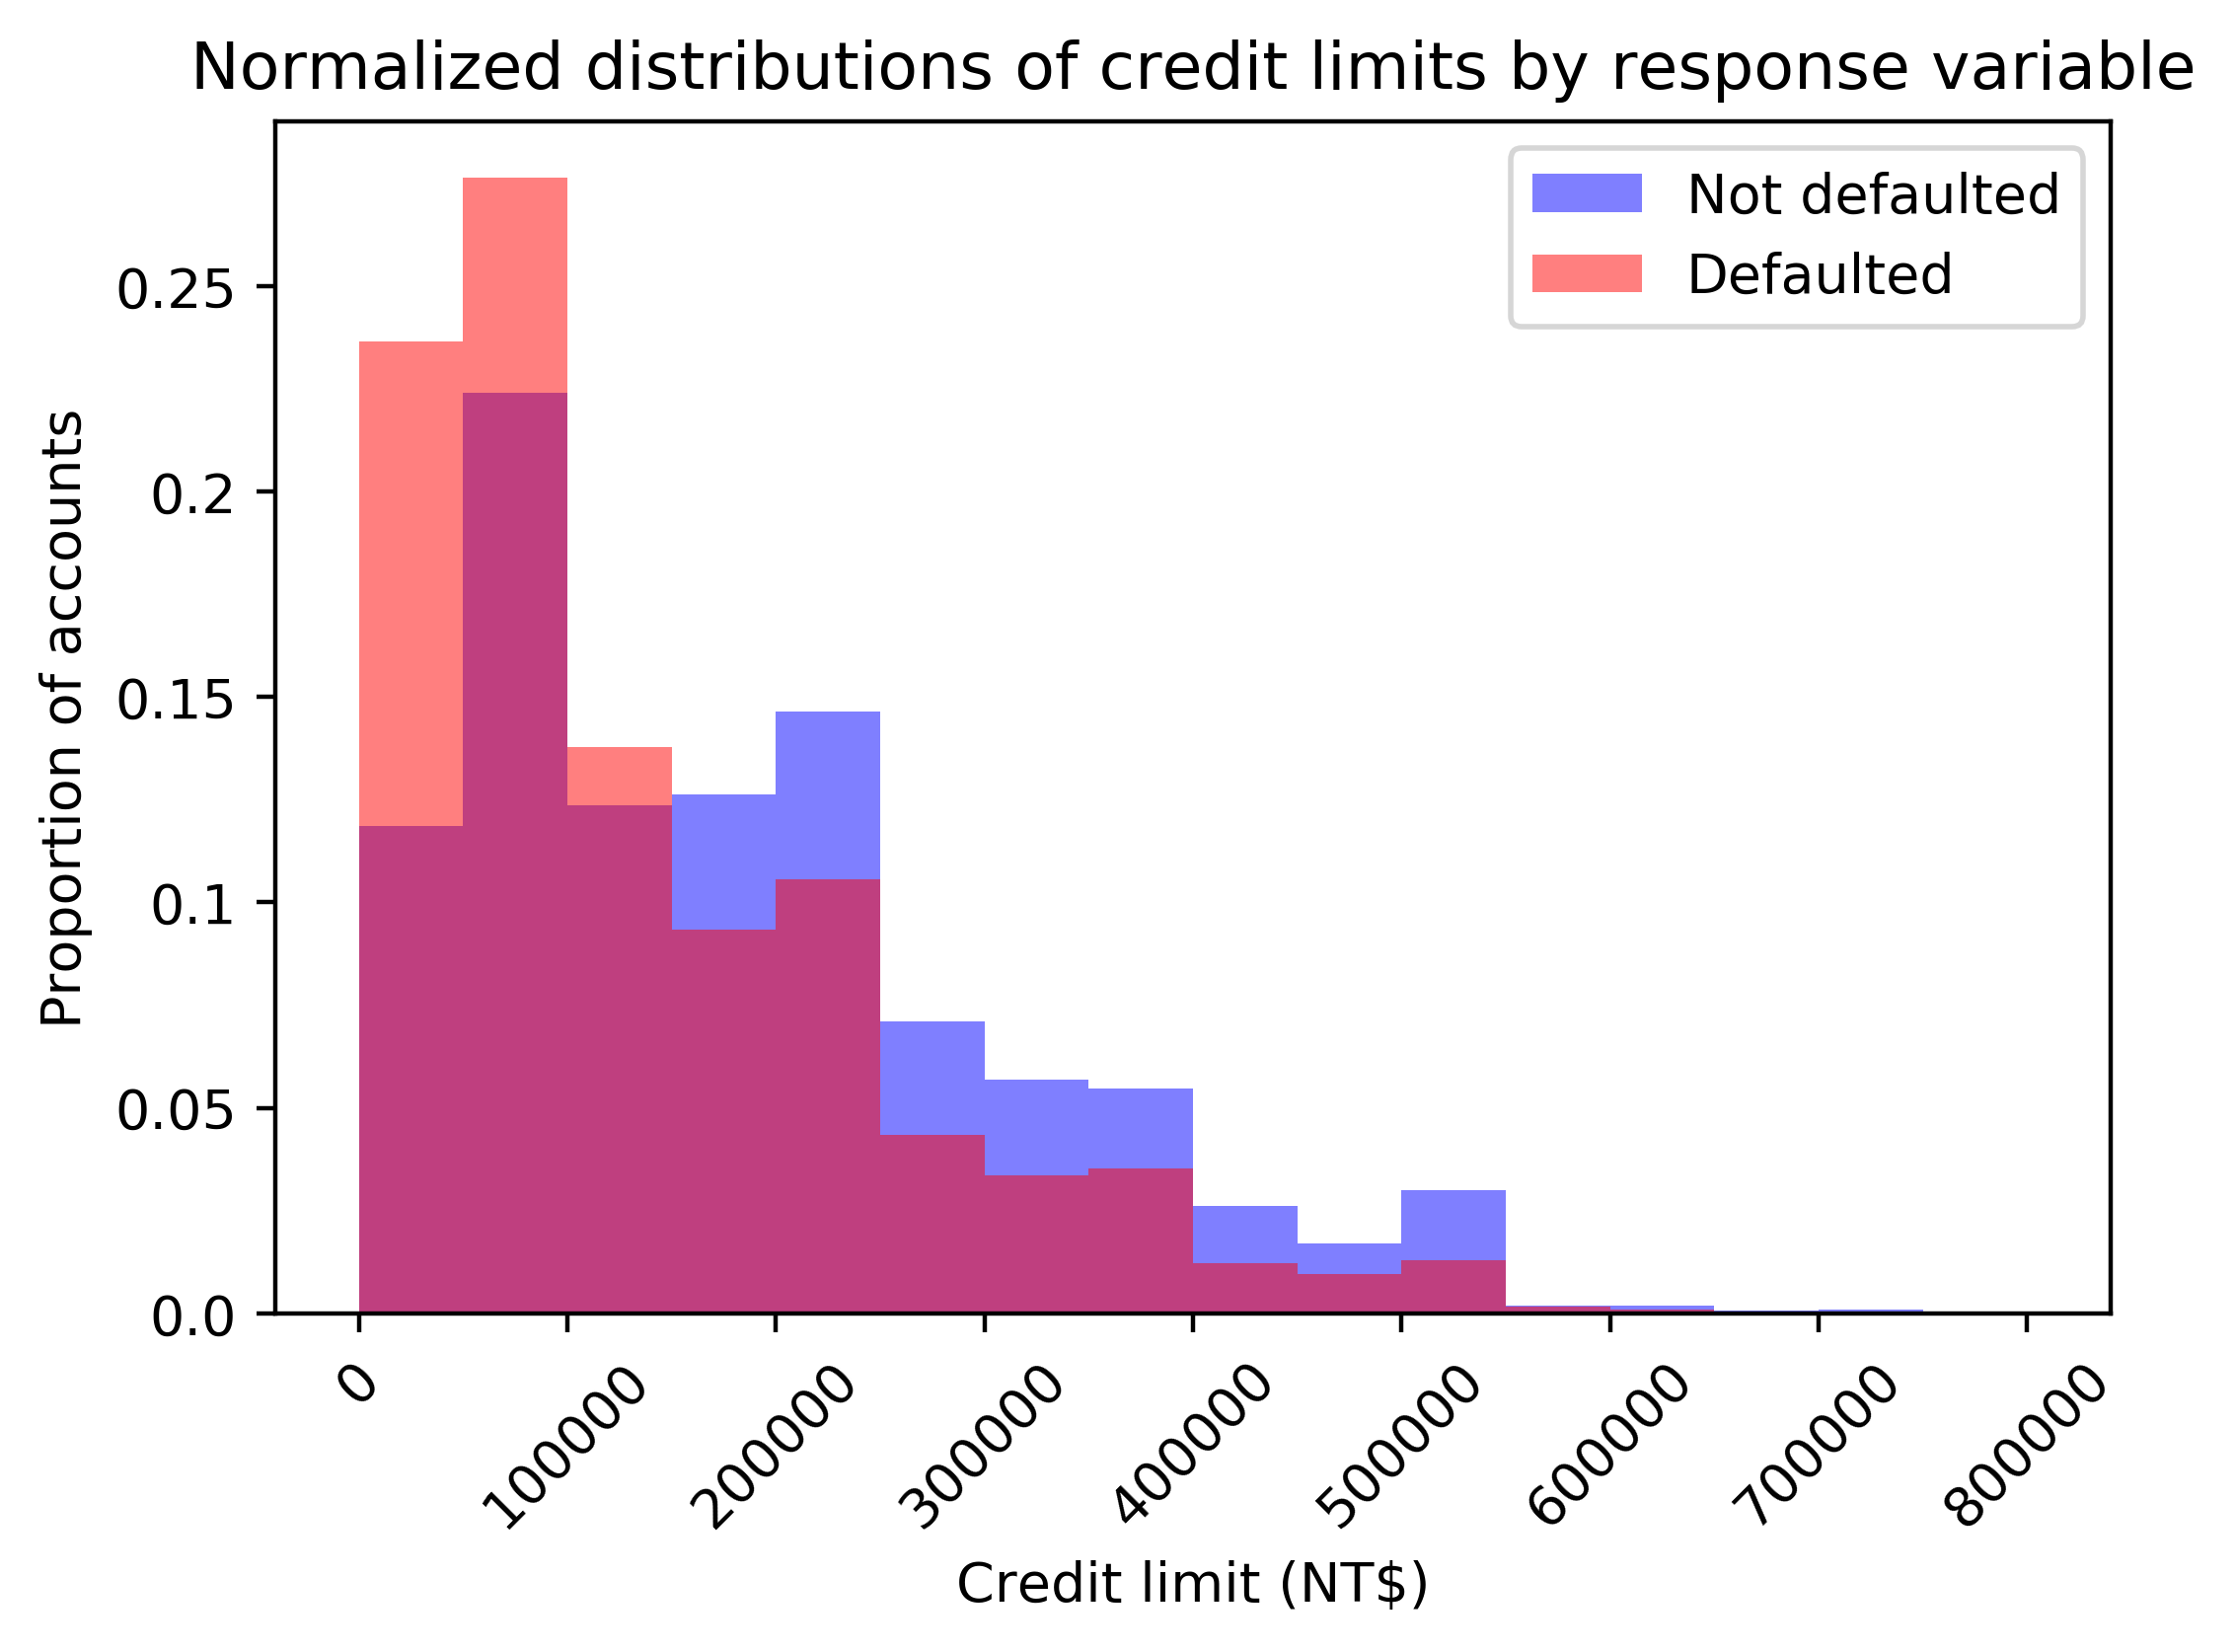

In [58]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [59]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [60]:
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [61]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

Text(0.5, 0, 'Values of PAY_1')

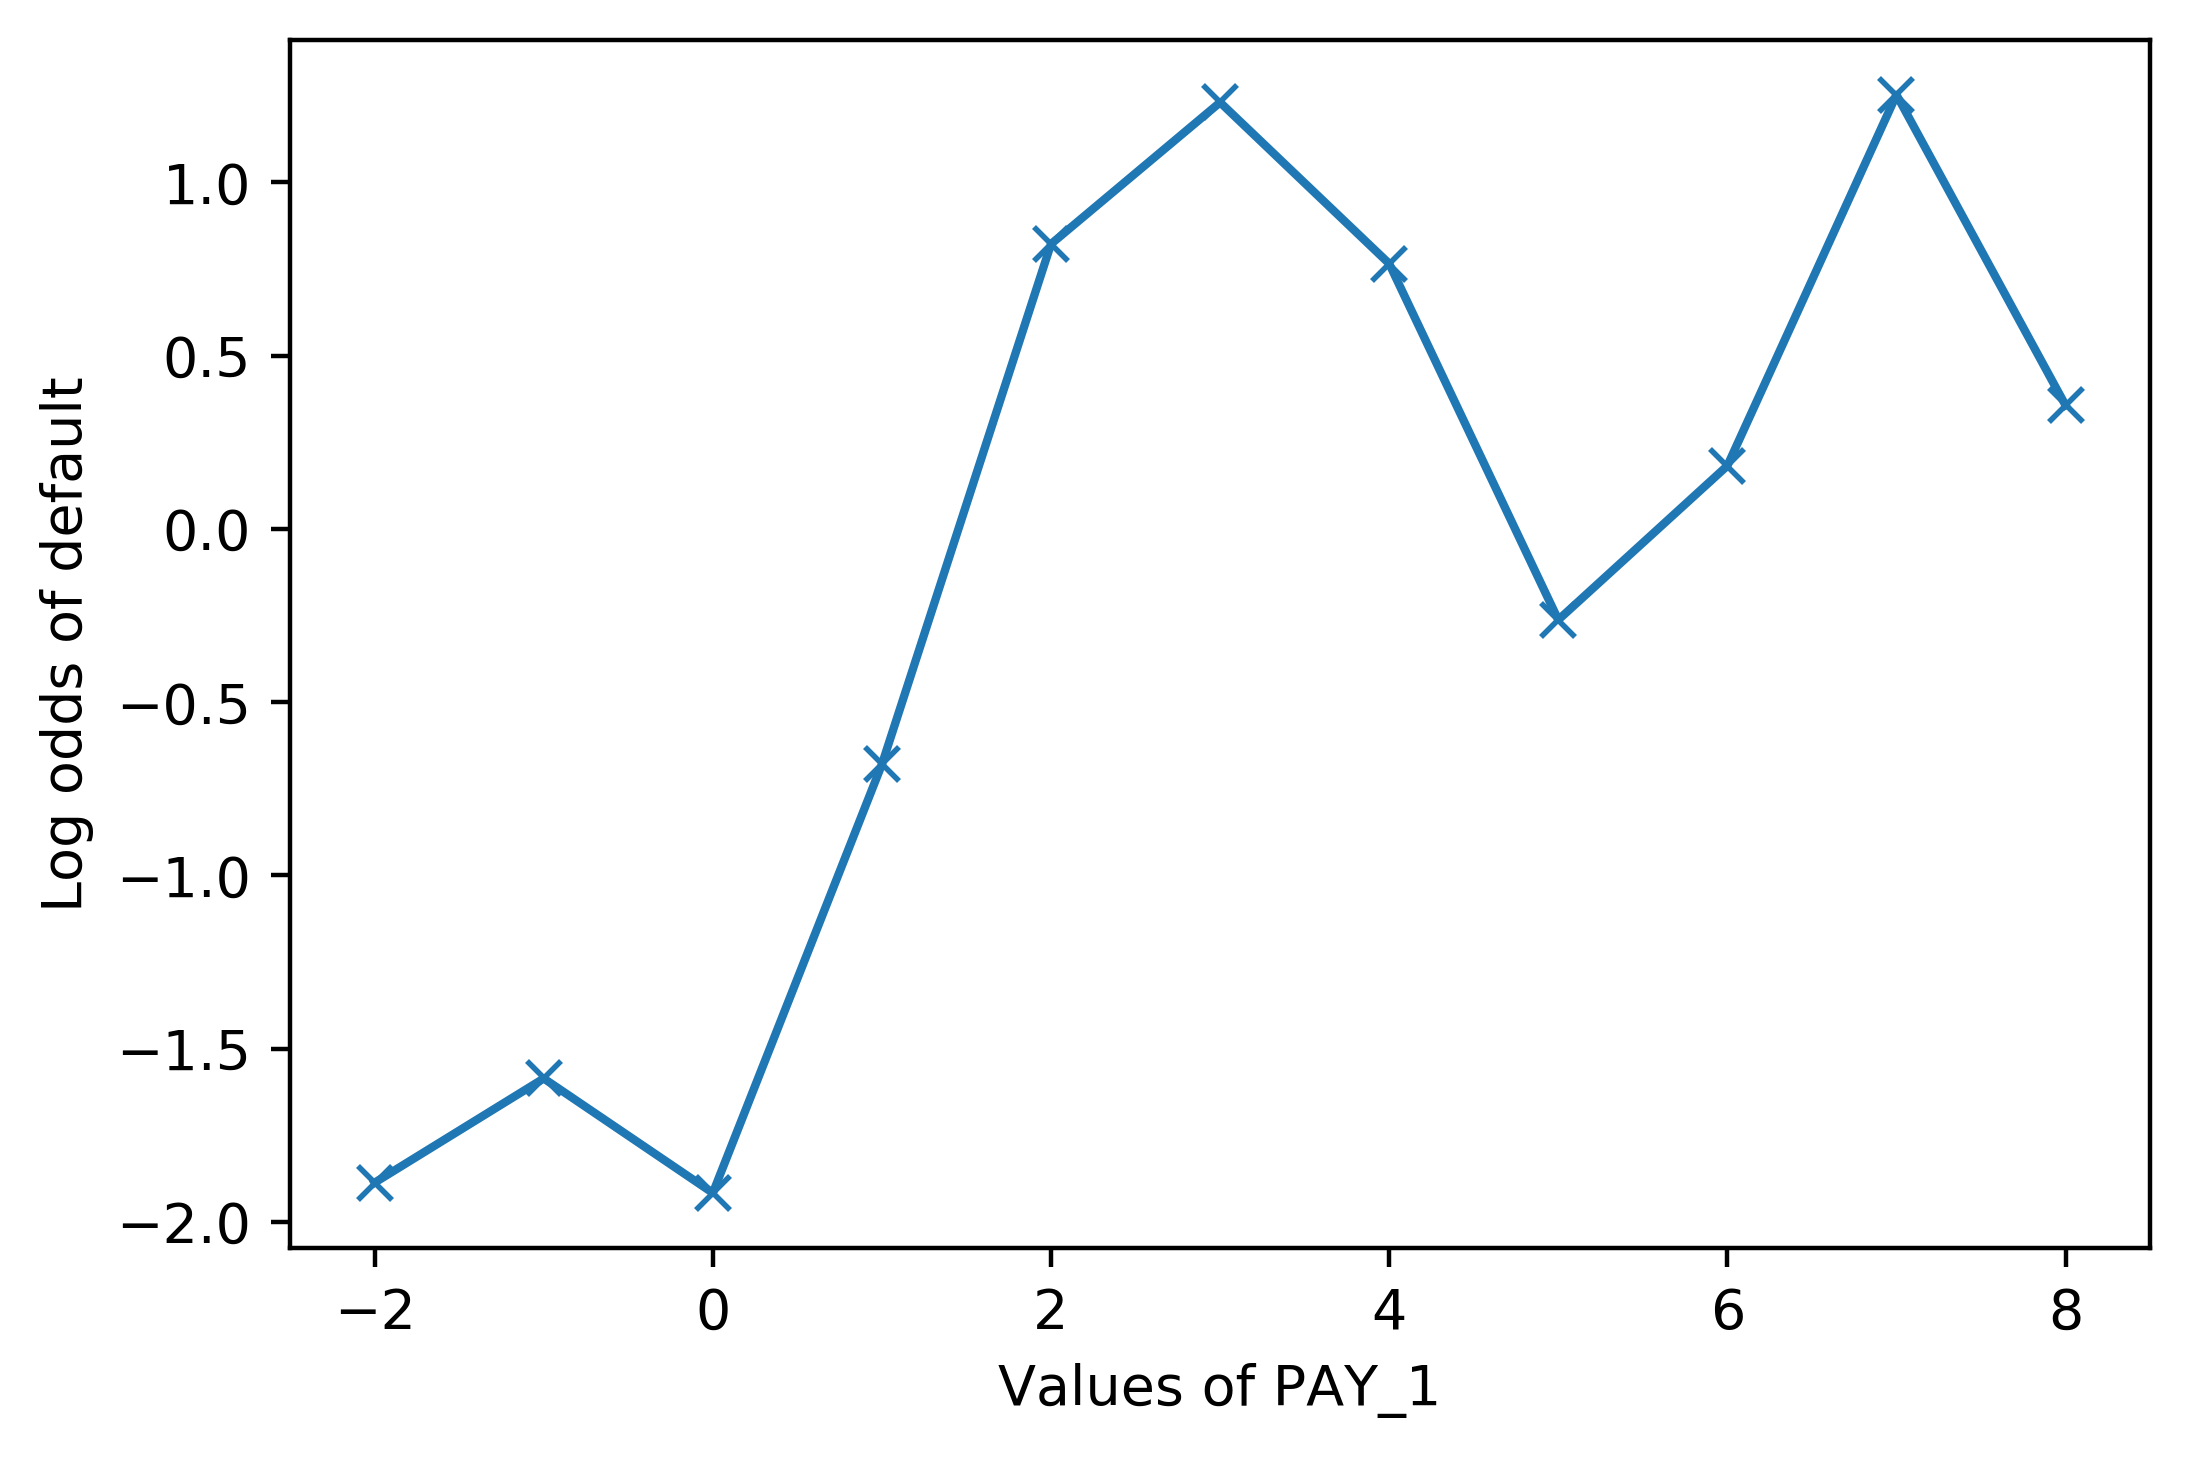

In [62]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

In [63]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
example_lr.fit(X, y)
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[0,
 21,
 28,
 57,
 61,
 82,
 83,
 95,
 108,
 111,
 119,
 146,
 147,
 175,
 199,
 235,
 245,
 260,
 265,
 280,
 288,
 297,
 299,
 322,
 329,
 336,
 346,
 378,
 383,
 441,
 478,
 487,
 552,
 583,
 586,
 605,
 666,
 673,
 674,
 698,
 701,
 716,
 719,
 732,
 744,
 749,
 758,
 764,
 769,
 785,
 809,
 811,
 836,
 846,
 877,
 922,
 933,
 936,
 942,
 946,
 954,
 971,
 1017,
 1018,
 1029,
 1031,
 1036,
 1060,
 1083,
 1115,
 1120,
 1123,
 1171,
 1179,
 1180,
 1183,
 1193,
 1201,
 1208,
 1222,
 1236,
 1253,
 1262,
 1285,
 1286,
 1289,
 1293,
 1301,
 1316,
 1339,
 1342,
 1346,
 1363,
 1369,
 1373,
 1375,
 1387,
 1426,
 1447,
 1465,
 1468,
 1477,
 1482,
 1542,
 1544,
 1549,
 1569,
 1583,
 1589,
 1591,
 1648,
 1676,
 1677,
 1687,
 1689,
 1751,
 1754,
 1761,
 1791,
 1797,
 1804,
 1810,
 1813,
 1835,
 1867,
 1872,
 1876,
 1878,
 1890,
 1896,
 1902,
 1905,
 1909,
 1918,
 1919,
 1923,
 1928,
 1971,
 1989,
 2002,
 2021,
 2025,
 2038,
 2046,
 2060,
 2090,
 2097,
 2125,
 2137,
 2138,
 2152,
 2163,
 2170,
